In [1]:
import numpy as np
import pandas as pd

import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model 


In [2]:
data_df = pd.read_csv("/Users/ahmadzarzar/Deep lärning Linjär_reg/CSV/heart.csv")

In [5]:
data_df.head(1040)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
data_df.shape

(1025, 14)

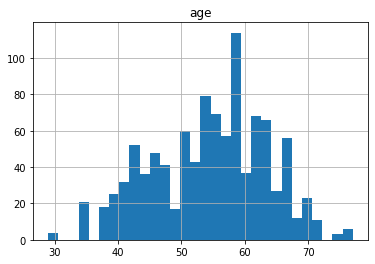

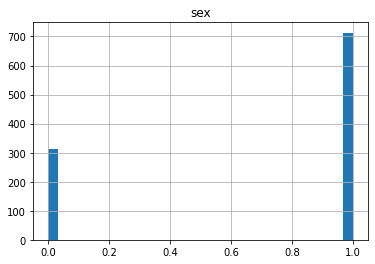

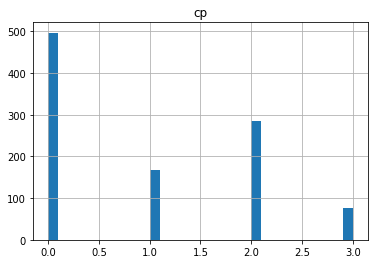

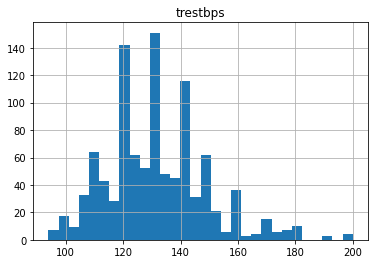

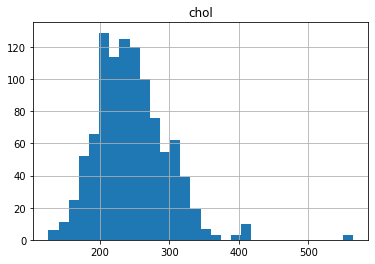

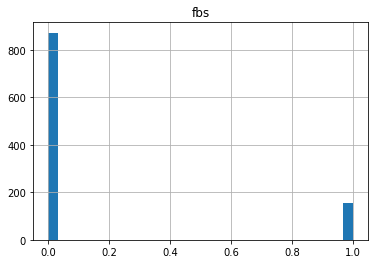

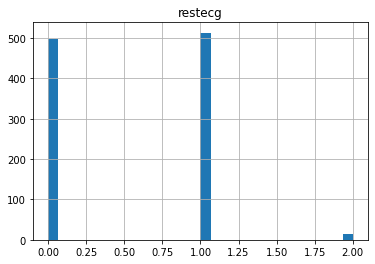

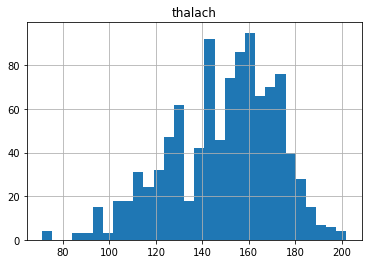

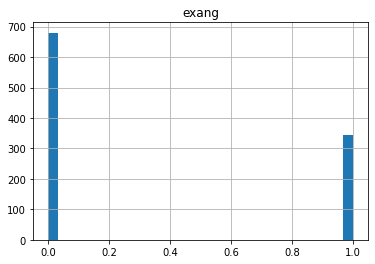

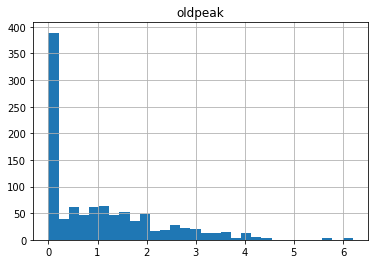

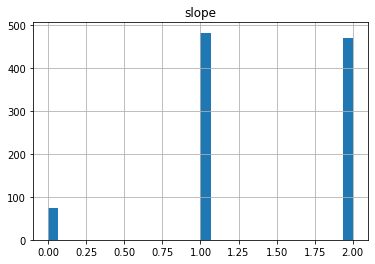

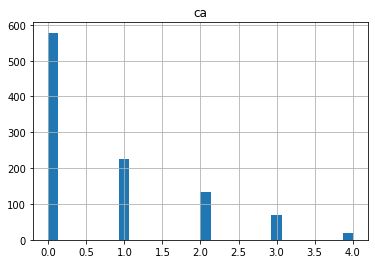

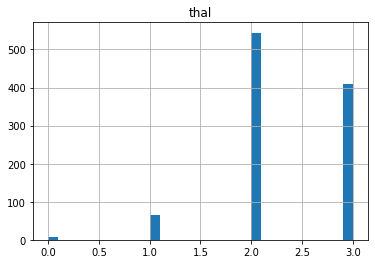

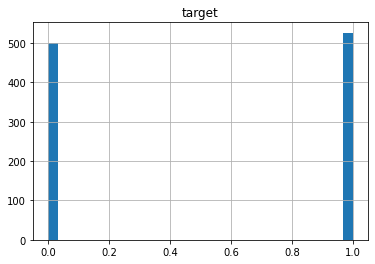

In [5]:
fethchar_list=[['age'],['sex'],['cp'],['trestbps'],['chol'],['fbs'],['restecg'],['thalach'],['exang']
,['oldpeak'],['slope'],['ca'],['thal'],['target']]

for x in fethchar_list:
    data_df[x].hist(bins=30)

In [6]:
x,y=data_df.drop(columns=['target']) , data_df.target
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [8]:

logistisk= linear_model.LogisticRegression()

logistisk.fit(x_train,y_train) # för att träna data

test=logistisk.score(x_test,y_test)  # för att testa data

träning=logistisk.score(x_train,y_train)

pred=logistisk.predict(x_test)

print(test)
print(50*'#')
print(träning)
print(50*'#')
print(pred)
print(50*'#')
print(f'coff {logistisk.coef_}')# dessa resultat som modullen kunde läsa av och ge närmaste värde (lutning)
print(50*'#')
print(f'intercept{logistisk.intercept_}')# korsningen

print(50*'#')

print(f'MSE{mean_squared_error(y_test,pred)}')# jämför mellan y test och pred

print(50*'#')

print(f'r2 score{r2_score(y_test,pred)}')


0.8439024390243902
##################################################
0.85
##################################################
[1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1]
##################################################
coff [[ 0.01447776 -1.61353861  0.86176952 -0.01421749 -0.00443882 -0.19688111
   0.69317969  0.03227864 -0.96463309 -0.51910093  0.49119411 -0.76555251
  -0.93064191]]
##################################################
intercept[0.03815285]
##################################################
MSE0.15609756097560976
##################################################
r2 score0.3712861797968182


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
def accuracy (y_true,y_pred):
    return np.sum(y_true == y_pred)/ len(y_true)

print(accuracy(y_test,pred))    

0.8439024390243902
